<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


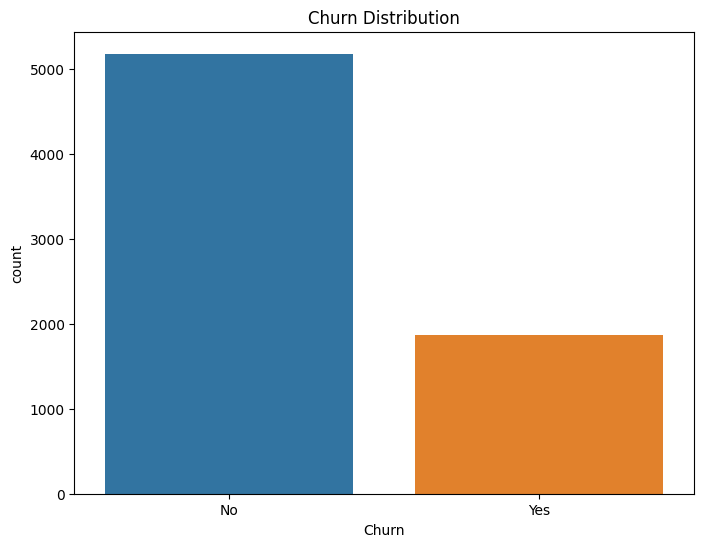

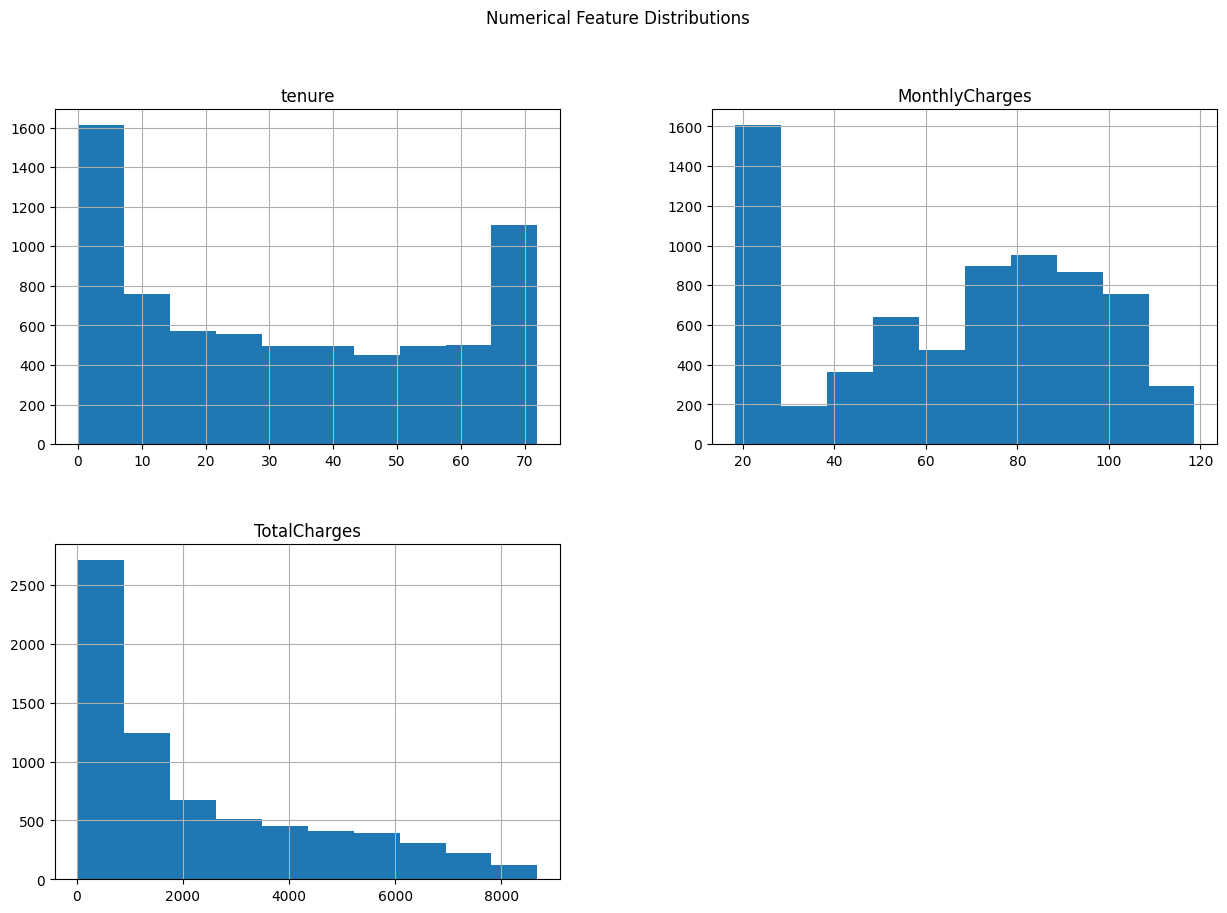

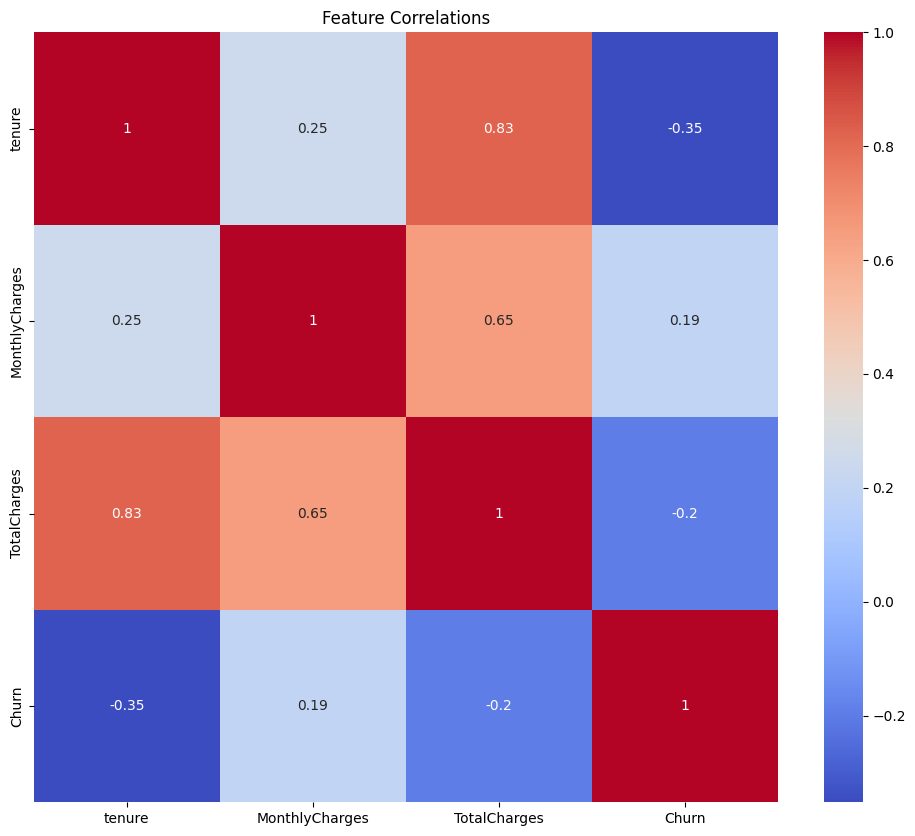

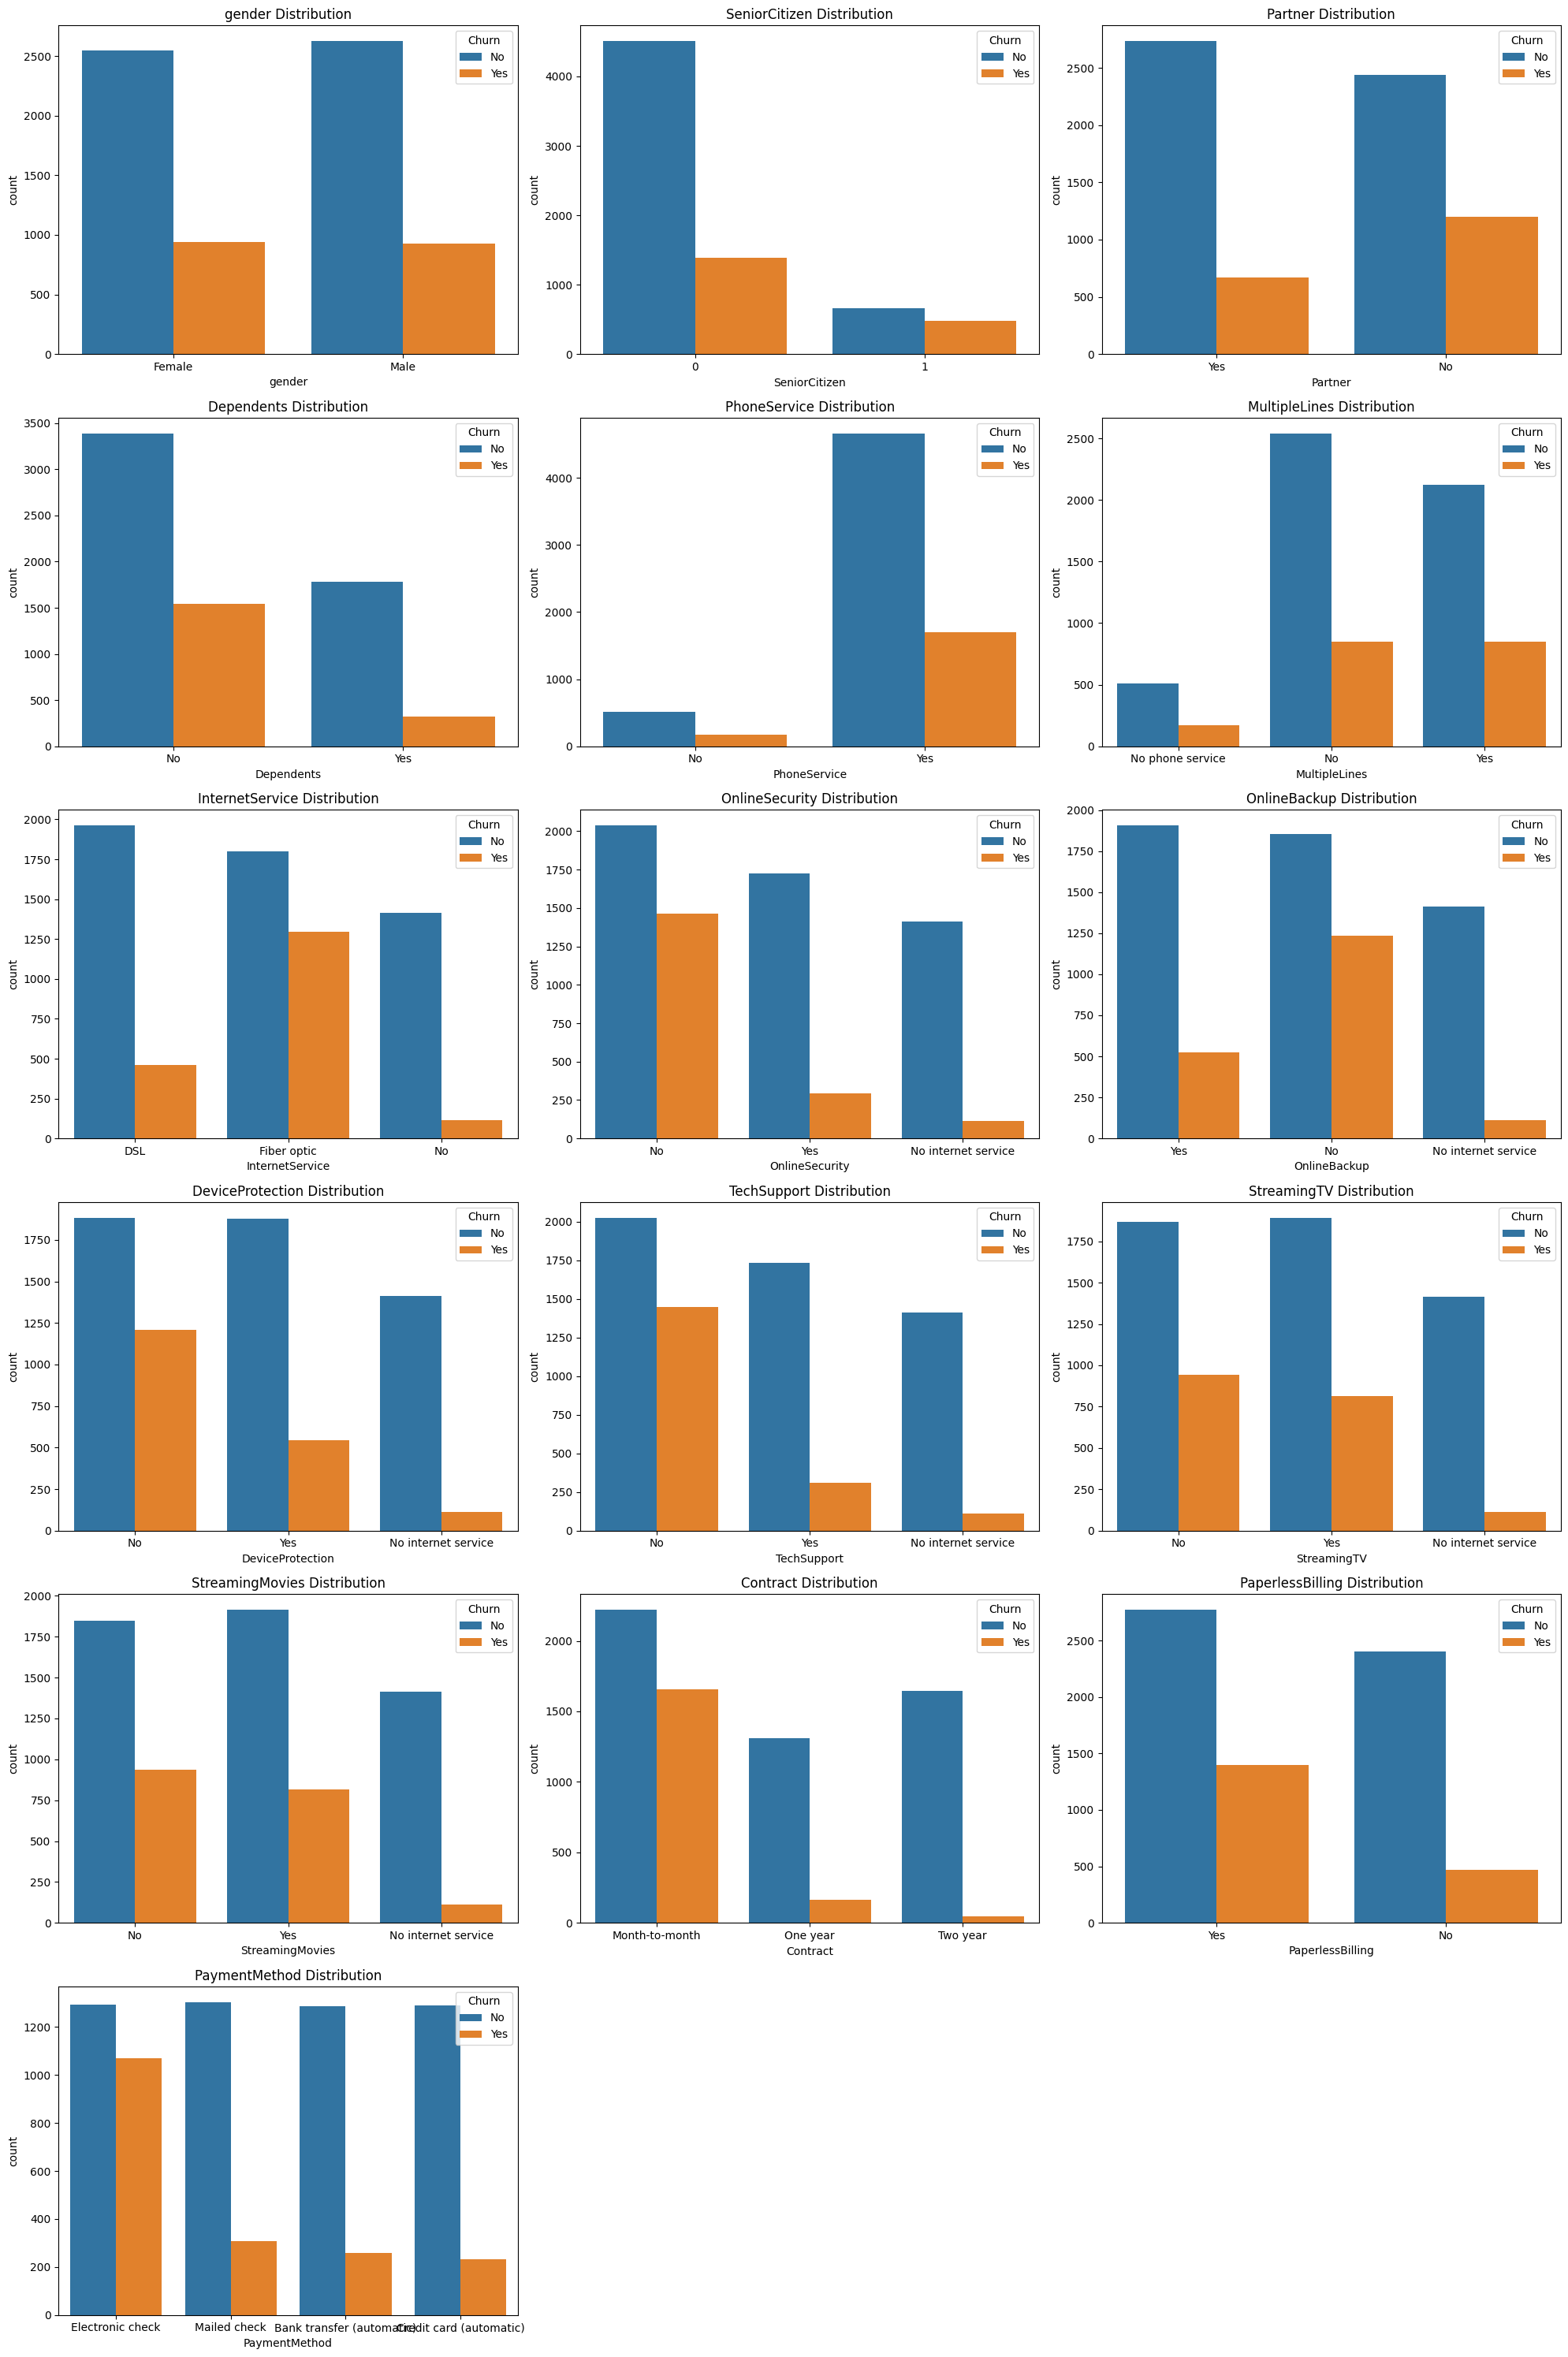

In [2]:
# Customer Churn Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Replace empty strings with NaN and fill NaN values with appropriate methods
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Exploratory Data Analysis (EDA)

# Plot churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Plot numerical feature distributions
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].hist(figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Compute and plot correlations only for numeric columns
numeric_df = df[numerical_features + ['Churn']].copy()
numeric_df['Churn'] = numeric_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Churn' to numeric

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Plot categorical feature distributions
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=feature, data=df, hue='Churn')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Encoding categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Save the preprocessed data for model building
df.to_csv('preprocessed_customer_churn_data.csv', index=False)
